In [97]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

In [68]:
pd.set_option('display.max_columns', 25)

In [69]:
dataset_url = './dataset/star_classification.csv'

df = pd.read_csv(dataset_url, sep=",")

In [70]:
df.shape

(100000, 18)

In [71]:
df.tail(5)

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,GALAXY,0.000000,9374,57749,438
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,GALAXY,0.404895,7626,56934,866
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,GALAXY,0.143366,2764,54535,74
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470
99999,1.237661e+18,196.896053,49.464643,22.62171,21.79745,20.60115,20.00959,19.28075,3650,301,4,60,8.343152e+18,GALAXY,0.542944,7410,57104,851


In [72]:
df.drop(["obj_ID", "run_ID", "rerun_ID", "field_ID", "fiber_ID", "spec_obj_ID"], axis=1, inplace=True)

In [118]:
df["class"].value_counts()

class
GALAXY    59445
STAR      21594
QSO       18961
Name: count, dtype: int64

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   alpha     100000 non-null  float64
 1   delta     100000 non-null  float64
 2   u         100000 non-null  float64
 3   g         100000 non-null  float64
 4   r         100000 non-null  float64
 5   i         100000 non-null  float64
 6   z         100000 non-null  float64
 7   cam_col   100000 non-null  int64  
 8   class     100000 non-null  object 
 9   redshift  100000 non-null  float64
 10  plate     100000 non-null  int64  
 11  MJD       100000 non-null  int64  
dtypes: float64(8), int64(3), object(1)
memory usage: 9.2+ MB


In [74]:
df.describe()

,alpha,delta,u,g,r,i,z,cam_col,redshift,plate,MJD
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,3.511610,0.576661,5137.009660,55588.647500
std,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1.586912,0.730707,2952.303351,1808.484233
min,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,1.000000,-0.009971,266.000000,51608.000000
25%,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,2.000000,0.054517,2526.000000,54234.000000
50%,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4.000000,0.424173,4987.000000,55868.500000
75%,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5.000000,0.704154,7400.250000,56777.000000
max,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,6.000000,7.011245,12547.000000,58932.000000


array([[<Axes: title={'center': 'alpha'}>,
        <Axes: title={'center': 'delta'}>, <Axes: title={'center': 'u'}>],
       [<Axes: title={'center': 'g'}>, <Axes: title={'center': 'r'}>,
        <Axes: title={'center': 'i'}>],
       [<Axes: title={'center': 'z'}>,
        <Axes: title={'center': 'cam_col'}>,
        <Axes: title={'center': 'redshift'}>],
       [<Axes: title={'center': 'plate'}>,
        <Axes: title={'center': 'MJD'}>, <Axes: >]], dtype=object)

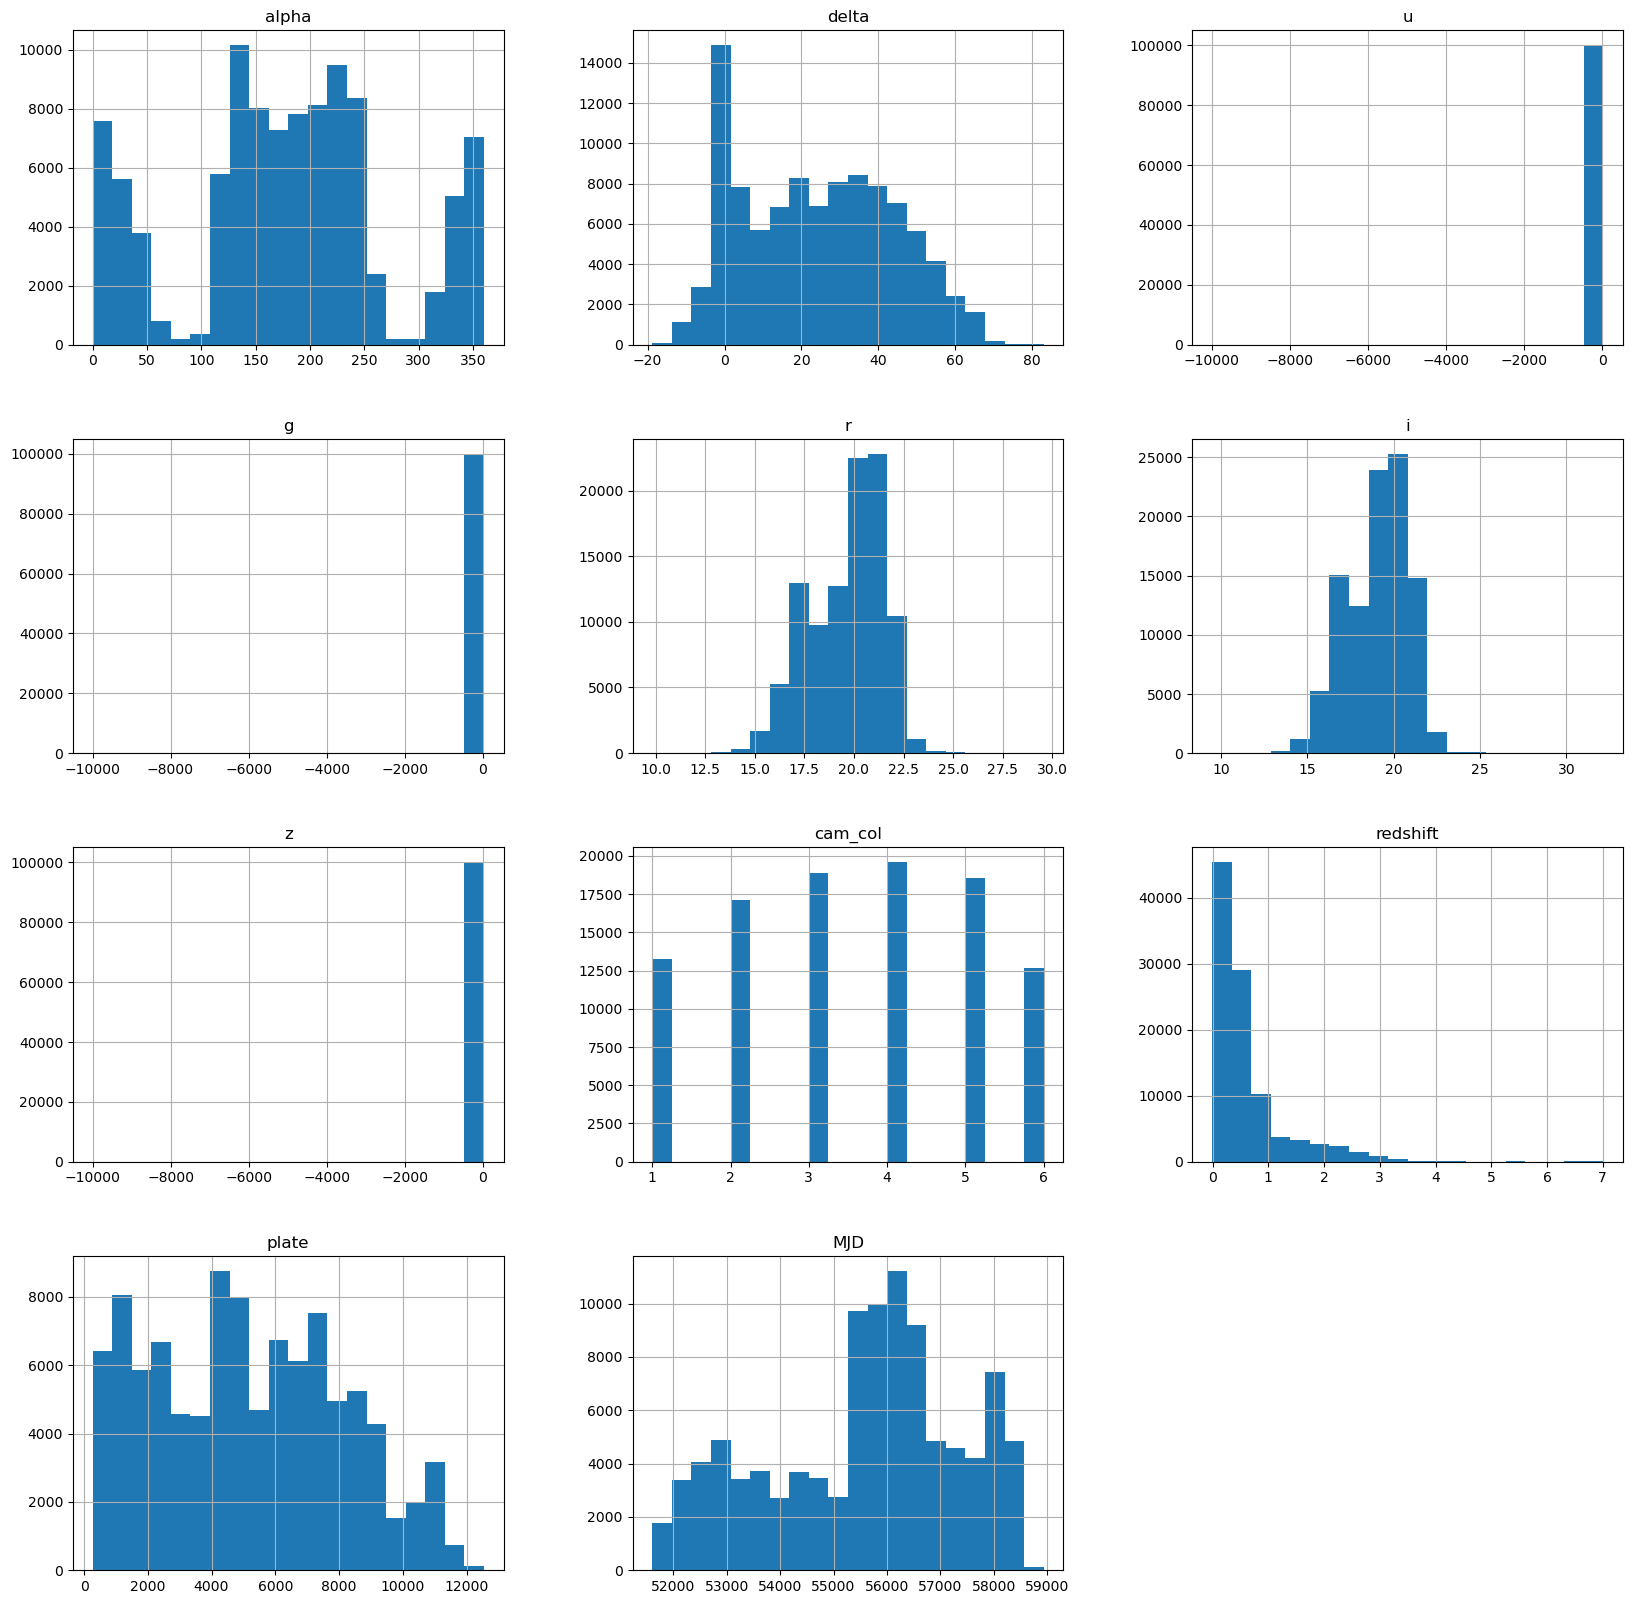

In [75]:
df.hist(figsize=(20, 20), bins=20)

In [76]:
tree = DecisionTreeClassifier()

In [77]:
train, test = train_test_split(df, test_size=0.2, stratify=df["class"])

In [78]:
print(train.shape)
print(test.shape)

(80000, 12)
(20000, 12)


In [104]:
X_train = train.drop(["class"], axis=1)
Y_train = train["class"]
X_test = test.drop(["class"], axis=1)
Y_test = test["class"]

In [105]:
from sklearn.preprocessing import LabelEncoder

lenc = LabelEncoder()

In [106]:
Y_train = lenc.fit_transform(Y_train)
Y_test = lenc.transform(Y_test)

In [107]:
strategy = {
    0:1767, 1:1767, 2:1767
}

smote = SMOTE(n_jobs=-1)

In [108]:
X_train, Y_train = smote.fit_resample(X_train, Y_train)

/home/uros/miniconda3/envs/data_mining/lib/python3.8/site-packages/imblearn/over_sampling/_smote/base.py:363: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


In [109]:
tree.fit(X_train, Y_train)

DecisionTreeClassifier()

In [110]:
Y_pred = tree.predict(X_test)

In [111]:
print(metrics.classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97     11889
           1       0.88      0.94      0.91      3792
           2       0.99      1.00      0.99      4319

    accuracy                           0.96     20000
   macro avg       0.95      0.96      0.96     20000
weighted avg       0.96      0.96      0.96     20000



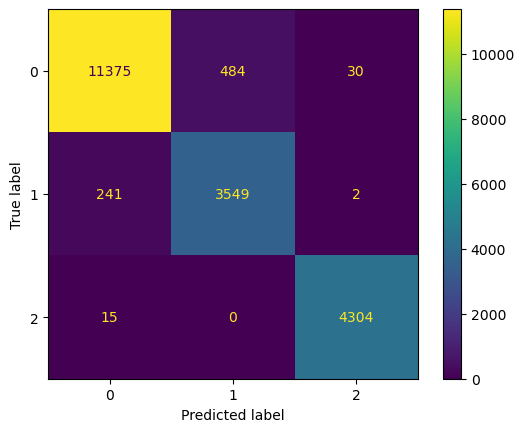

In [112]:
cm = metrics.confusion_matrix(Y_test, Y_pred)
cmd = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
cmd.plot()

In [113]:
rf = RandomForestClassifier(n_estimators=300, n_jobs=-1)

In [114]:
rf.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=300, n_jobs=-1)

In [115]:
Y_pred = rf.predict(X_test)

In [116]:
print(metrics.classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     11889
           1       0.95      0.95      0.95      3792
           2       0.99      1.00      0.99      4319

    accuracy                           0.98     20000
   macro avg       0.97      0.98      0.97     20000
weighted avg       0.98      0.98      0.98     20000



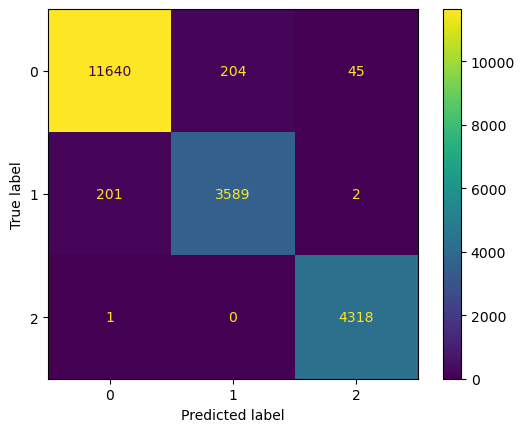

In [117]:
cm = metrics.confusion_matrix(Y_test, Y_pred)
cmd = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
cmd.plot()